In [1]:
# Import essential libraries for data analysis and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Statistical Libraries
from scipy import stats
from scipy.stats import pearsonr, spearmanr

# DateTime handling
from datetime import datetime
import calendar

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8')

print('All libraries imported successfully!')

All libraries imported successfully!


In [2]:
# Load the three datasets
try:
    # Load stores dataset - contains store information
    stores_df = pd.read_csv('stores data-set.csv')
    print('Stores dataset loaded successfully!')
    
    # Load features dataset - contains external factors
    features_df = pd.read_csv('Features data set.csv')
    print('Features dataset loaded successfully!')
    
    # Load sales dataset - contains weekly sales data
    sales_df = pd.read_csv('sales data-set.csv')
    print('Sales dataset loaded successfully!')
    
except FileNotFoundError as e:
    print(f'Error: {e}')
    print('Please ensure all data files are in the current directory')
except Exception as e:
    print(f'An error occurred: {e}')

Stores dataset loaded successfully!
Features dataset loaded successfully!
Sales dataset loaded successfully!


In [3]:
# Display basic information about each dataset
print('=== STORES DATASET ===')
print('Shape:', stores_df.shape)
print('Columns:', stores_df.columns.tolist())
print('\nFirst 5 rows:')
display(stores_df.head())

print('\n=== FEATURES DATASET ===')
print('Shape:', features_df.shape)
print('Columns:', features_df.columns.tolist())
print('\nFirst 5 rows:')
display(features_df.head())

print('\n=== SALES DATASET ===')
print('Shape:', sales_df.shape)
print('Columns:', sales_df.columns.tolist())
print('\nFirst 5 rows:')
display(sales_df.head())

=== STORES DATASET ===
Shape: (45, 3)
Columns: ['Store', 'Type', 'Size']

First 5 rows:


Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


=== FEATURES DATASET ===
Shape: (8190, 12)
Columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']

First 5 rows:


Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False


=== SALES DATASET ===
Shape: (421570, 5)
Columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']

First 5 rows:


Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

In [4]:
# Detailed information about each dataset
print('=== STORES DATASET INFO ===')
print(stores_df.info())
print('\n=== FEATURES DATASET INFO ===')
print(features_df.info())
print('\n=== SALES DATASET INFO ===')
print(sales_df.info())

=== STORES DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None

=== FEATURES DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 

In [5]:
# Check for duplicate values in each dataset
print('Duplicate Values Analysis:')
print('=' * 30)

stores_duplicates = stores_df.duplicated().sum()
features_duplicates = features_df.duplicated().sum()
sales_duplicates = sales_df.duplicated().sum()

print(f'Stores dataset duplicates: {stores_duplicates}')
print(f'Features dataset duplicates: {features_duplicates}')
print(f'Sales dataset duplicates: {sales_duplicates}')

if stores_duplicates + features_duplicates + sales_duplicates == 0:
    print('\n‚úÖ No duplicate rows found in any dataset!')
else:
    print('\n‚ö†Ô∏è Duplicate rows found! Will need to handle them during preprocessing.')

Duplicate Values Analysis:
Stores dataset duplicates: 0
Features dataset duplicates: 0
Sales dataset duplicates: 0

‚úÖ No duplicate rows found in any dataset!


In [6]:
# Check for missing values in each dataset
def analyze_missing_values(df, dataset_name):
    print(f'\n=== {dataset_name} MISSING VALUES ===')
    missing_count = df.isnull().sum()
    missing_percent = (df.isnull().sum() / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Column': missing_count.index,
        'Missing Count': missing_count.values,
        'Missing Percentage': missing_percent.values
    })
    
    # Filter only columns with missing values
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    
    if len(missing_df) == 0:
        print('‚úÖ No missing values found!')
    else:
        display(missing_df)
    
    return missing_df

# Analyze missing values for all datasets
stores_missing = analyze_missing_values(stores_df, 'STORES')
features_missing = analyze_missing_values(features_df, 'FEATURES')
sales_missing = analyze_missing_values(sales_df, 'SALES')


=== STORES MISSING VALUES ===
‚úÖ No missing values found!

=== FEATURES MISSING VALUES ===


Column  Missing Count  Missing Percentage
5      MarkDown2           5269           64.334554
7      MarkDown4           4726           57.704518
6      MarkDown3           4577           55.885226
4      MarkDown1           4158           50.769231
8      MarkDown5           4140           50.549451
9            CPI            585            7.142857
10  Unemployment            585            7.142857


=== SALES MISSING VALUES ===
‚úÖ No missing values found!


In [7]:
import pandas as pd
import numpy as np

print('=== STARTING DATA WRANGLING PROCESS ===')

# Step 1: Create copies for processing
stores_clean = stores_df.copy()
features_clean = features_df.copy()
sales_clean = sales_df.copy()

# Step 2: Convert date columns to datetime - DDMMYYYY format
print('Converting date columns to datetime...')

def convert_date_format(date_val):
    """Convert date from DDMMYYYY (int) or DD/MM/YYYY (str) to datetime."""
    try:
        # If it's already a datetime, return as is
        if isinstance(date_val, pd.Timestamp):
            return date_val

        # If it's a string with slashes
        if isinstance(date_val, str) and '/' in date_val:
            return pd.to_datetime(date_val, format='%d/%m/%Y', errors='coerce')

        # If it's an integer-like DDMMYYYY
        date_str = str(int(date_val))
        if len(date_str) == 8:
            day = date_str[:2]
            month = date_str[2:4]
            year = date_str[4:]
            return pd.to_datetime(f'{year}-{month}-{day}', format='%Y-%m-%d', errors='coerce')

        return pd.NaT  # If format doesn't match
    except Exception as e:
        print(f"Invalid date: {date_val} -> {e}")
        return pd.NaT
        
# Apply conversion safely
features_clean['Date'] = features_clean['Date'].apply(convert_date_format)
sales_clean['Date'] = sales_clean['Date'].apply(convert_date_format)

# Drop rows with invalid dates
features_clean = features_clean.dropna(subset=['Date'])
sales_clean = sales_clean.dropna(subset=['Date'])

print('‚úÖ Date conversion completed successfully!')

# Step 3: Handle missing values in features dataset
print('Handling missing values...')

# Fill MarkDowns with 0
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_cols:
    if col in features_clean.columns:
        features_clean[col] = features_clean[col].fillna(0)
        print(f'  Filled {col} missing values with 0')

# Fill CPI and Unemployment with ffill/bfill
if 'CPI' in features_clean.columns:
    features_clean['CPI'] = features_clean['CPI'].fillna(method='ffill').fillna(method='bfill')
    print('  Filled CPI using forward/backward fill')

if 'Unemployment' in features_clean.columns:
    features_clean['Unemployment'] = features_clean['Unemployment'].fillna(method='ffill').fillna(method='bfill')
    print('  Filled Unemployment using forward/backward fill')

# Step 4: Feature Engineering - Extract temporal features
print('Creating temporal features...')

def add_temporal_features(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['Quarter'] = df['Date'].dt.quarter
    df['DayOfYear'] = df['Date'].dt.dayofyear
    df['WeekOfYear'] = df['Week']  # alias
    return df

features_clean = add_temporal_features(features_clean)
sales_clean = add_temporal_features(sales_clean)

# Step 5: Create seasonal indicators
print('Creating seasonal indicators...')

def get_season(month):
    try:
        if pd.isna(month):
            return 'Unknown'
        month = int(month)
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        elif month in [9, 10, 11]:
            return 'Fall'
        else:
            return 'Unknown'
    except:
        return 'Unknown'

features_clean['Season'] = features_clean['Month'].apply(get_season)
sales_clean['Season'] = sales_clean['Month'].apply(get_season)

print('  Added Year, Month, Week, Quarter, Season features')

# Step 6: Merge datasets for comprehensive analysis
print('Merging datasets...')

# Merge sales and features
sales_features = pd.merge(sales_clean, features_clean, on=['Store', 'Date'], how='left', suffixes=('', '_feat'))

# Use IsHoliday from features if duplicated
if 'IsHoliday_feat' in sales_features.columns:
    sales_features['IsHoliday'] = sales_features['IsHoliday_feat'].combine_first(sales_features['IsHoliday'])
    sales_features.drop(columns=['IsHoliday_feat'], inplace=True)

# Merge with stores data
final_df = pd.merge(sales_features, stores_clean, on='Store', how='left')

print(f'  Final merged dataset shape: {final_df.shape}')

# Step 7: Final missing value handling
print('Final missing value check...')
missing_final = final_df.isnull().sum()
missing_count = missing_final.sum()

if missing_count == 0:
    print('‚úÖ No missing values in final dataset!')
else:
    print(f'‚ö†Ô∏è Found {missing_count} missing values:')
    print(missing_final[missing_final > 0])

    # Fill numeric columns with median
    numeric_columns = final_df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        if final_df[col].isnull().sum() > 0:
            median_val = final_df[col].median()
            final_df[col].fillna(median_val, inplace=True)
            print(f'  Filled {col} missing values with median ({median_val})')

# Step 8: Create business metrics
print('Creating business metrics...')

# Sales per square foot
if 'Size' in final_df.columns and 'Weekly_Sales' in final_df.columns:
    final_df['Sales_Per_SqFt'] = final_df['Weekly_Sales'] / final_df['Size']
    final_df['Sales_Per_SqFt'].replace([np.inf, -np.inf], 0, inplace=True)

# Total markdown amount
markdown_cols_in_df = [col for col in markdown_cols if col in final_df.columns]
if markdown_cols_in_df:
    final_df['Total_MarkDown'] = final_df[markdown_cols_in_df].sum(axis=1)
else:
    final_df['Total_MarkDown'] = 0

# Holiday effect (binary)
final_df['Holiday_Effect'] = final_df.get('IsHoliday', False).astype(int)

# Step 9: Validate ranges and summaries
print('Validating data...')

# Check date range
if 'Date' in final_df.columns:
    min_date = final_df['Date'].min()
    max_date = final_df['Date'].max()
    print(f'  Date range: {min_date.date()} to {max_date.date()}')

# Check sales stats
if 'Weekly_Sales' in final_df.columns:
    sales_stats = final_df['Weekly_Sales'].describe()
    print(f'  Sales range: ${sales_stats["min"]:,.2f} to ${sales_stats["max"]:,.2f}')

print('‚úÖ Data wrangling completed successfully!')
print(f'Final dataset shape: {final_df.shape}')
print(f'Columns: {len(final_df.columns)}')

# Final summary
print('\nFinal Dataset Summary:')
print(f'  Stores: {final_df["Store"].nunique()}')
print(f'  Departments: {final_df["Dept"].nunique()}')
print(f'  Date Range: {final_df["Date"].min().date()} to {final_df["Date"].max().date()}')
print(f'  Total Records: {len(final_df):,}')


=== STARTING DATA WRANGLING PROCESS ===
Converting date columns to datetime...
‚úÖ Date conversion completed successfully!
Handling missing values...
  Filled MarkDown1 missing values with 0
  Filled MarkDown2 missing values with 0
  Filled MarkDown3 missing values with 0
  Filled MarkDown4 missing values with 0
  Filled MarkDown5 missing values with 0
  Filled CPI using forward/backward fill
  Filled Unemployment using forward/backward fill
Creating temporal features...
Creating seasonal indicators...
  Added Year, Month, Week, Quarter, Season features
Merging datasets...
  Final merged dataset shape: (421570, 30)
Final missing value check...
‚úÖ No missing values in final dataset!
Creating business metrics...
Validating data...
  Date range: 2010-02-05 to 2012-10-26
  Sales range: $-4,988.94 to $693,099.36
‚úÖ Data wrangling completed successfully!
Final dataset shape: (421570, 33)
Columns: 33

Final Dataset Summary:
  Stores: 45
  Departments: 81
  Date Range: 2010-02-05 to 2012-10-

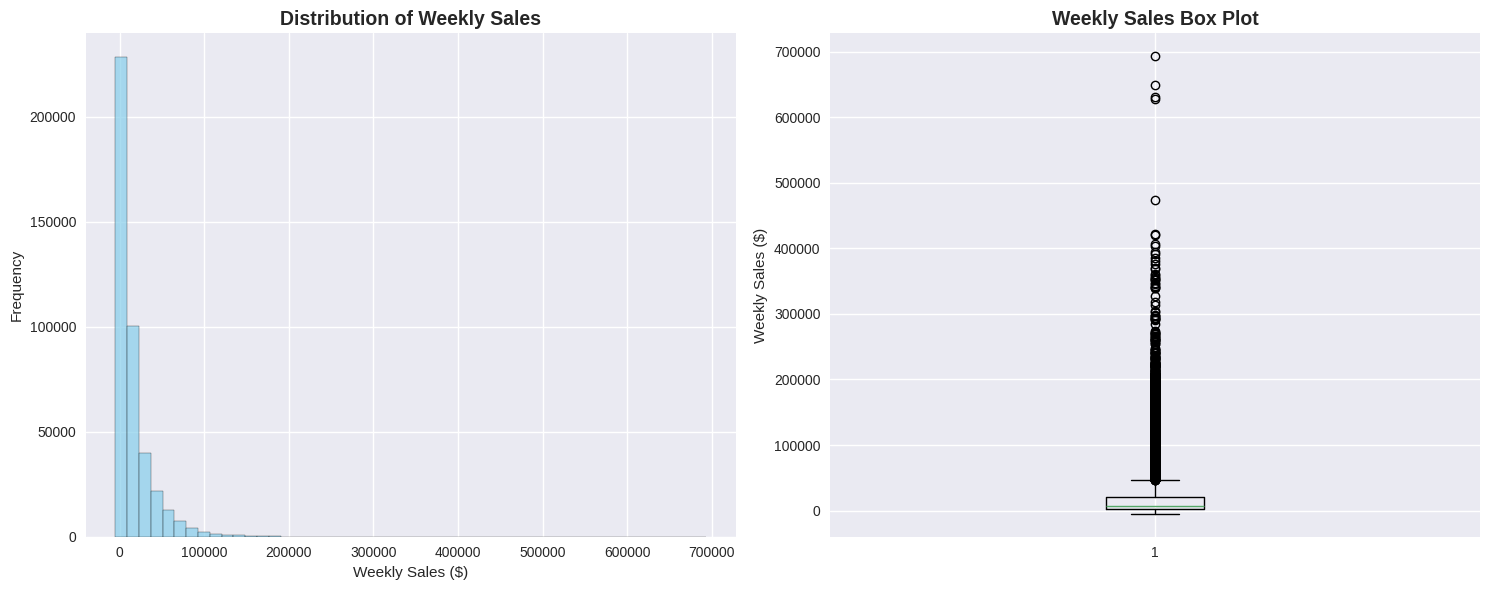

Weekly Sales Statistical Summary:
count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64


In [8]:
# Chart 1: Distribution of Weekly Sales
plt.figure(figsize=(15, 6))

# Subplot 1: Histogram
plt.subplot(1, 2, 1)
plt.hist(final_df['Weekly_Sales'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Weekly Sales', fontsize=14, fontweight='bold')
plt.xlabel('Weekly Sales ($)')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')

# Subplot 2: Box plot
plt.subplot(1, 2, 2)
plt.boxplot(final_df['Weekly_Sales'])
plt.title('Weekly Sales Box Plot', fontsize=14, fontweight='bold')
plt.ylabel('Weekly Sales ($)')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

# Statistical summary
print('Weekly Sales Statistical Summary:')
print(final_df['Weekly_Sales'].describe())

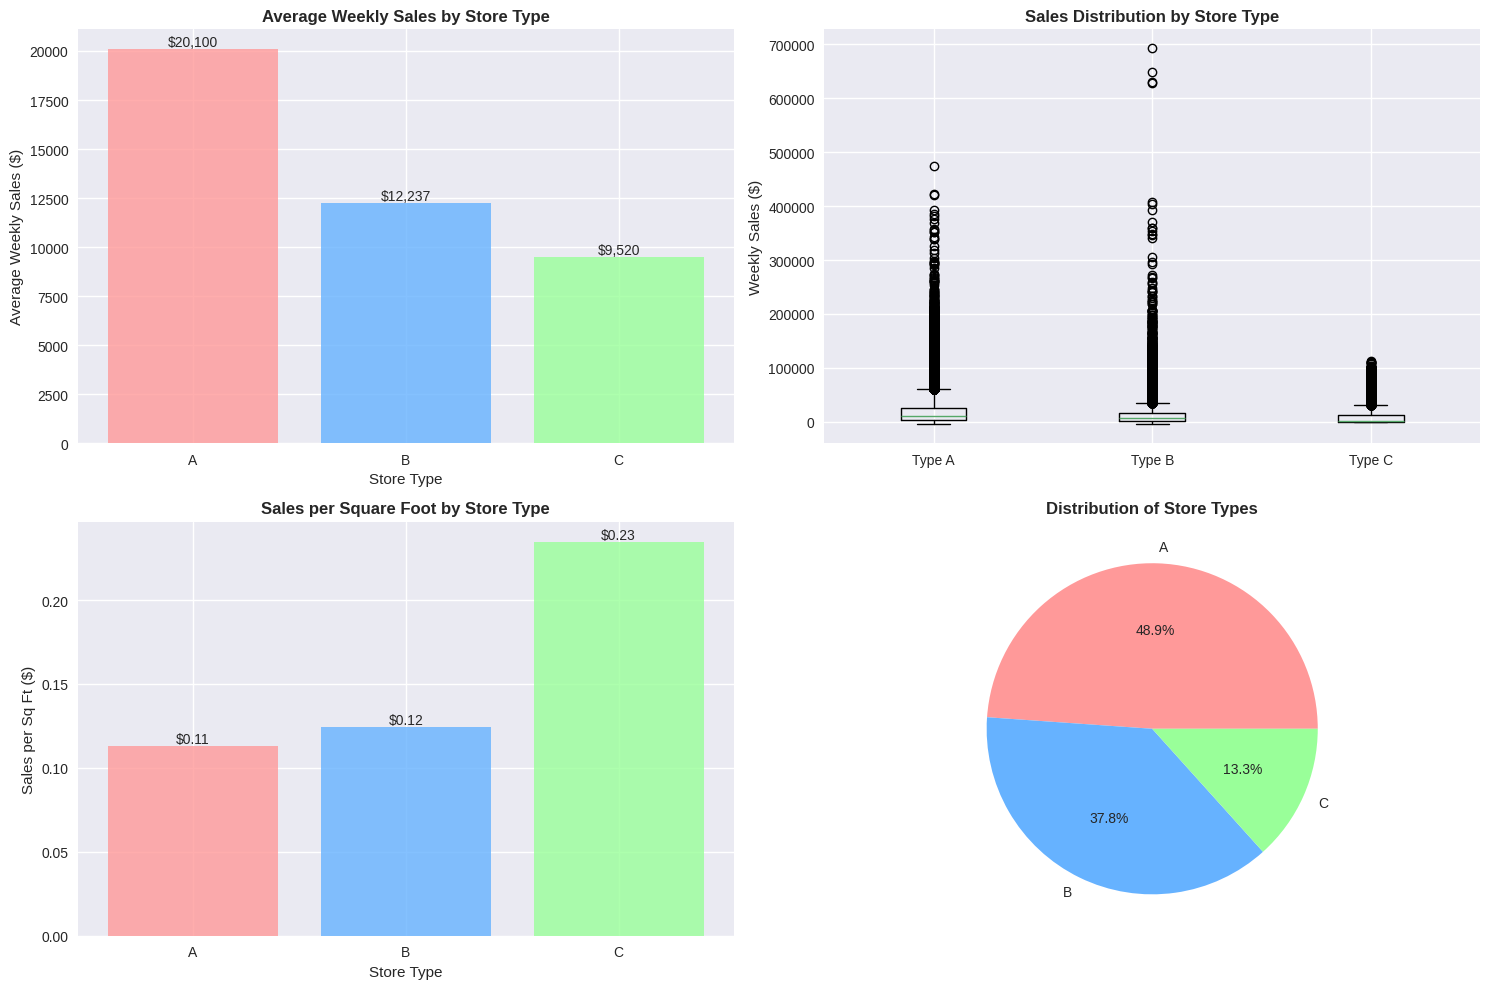

Store Type Performance Summary:
     Weekly_Sales                                       Size Sales_Per_SqFt
             mean    median           sum   count       mean           mean
Type                                                                       
A        20099.57  10105.17  4.331015e+09  215478  182231.29           0.11
B        12237.08   6187.87  2.000701e+09  163495  101818.74           0.12
C         9519.53   1149.67  4.055035e+08   42597   40535.73           0.23


In [9]:
# Chart 2: Sales Performance by Store Type
plt.figure(figsize=(15, 10))

# Calculate aggregated metrics by store type
store_type_stats = final_df.groupby('Type').agg({
    'Weekly_Sales': ['mean', 'median', 'sum', 'count'],
    'Size': 'mean',
    'Sales_Per_SqFt': 'mean'
}).round(2)

# Subplot 1: Average Weekly Sales by Store Type
plt.subplot(2, 2, 1)
avg_sales_by_type = final_df.groupby('Type')['Weekly_Sales'].mean()
bars1 = plt.bar(avg_sales_by_type.index, avg_sales_by_type.values, 
                color=['#FF9999', '#66B2FF', '#99FF99'], alpha=0.8)
plt.title('Average Weekly Sales by Store Type', fontsize=12, fontweight='bold')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales ($)')
plt.ticklabel_format(style='plain', axis='y')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}', ha='center', va='bottom')

# Subplot 2: Box plot of sales by store type
plt.subplot(2, 2, 2)
box_data = [final_df[final_df['Type'] == t]['Weekly_Sales'] for t in ['A', 'B', 'C']]
plt.boxplot(box_data, labels=['Type A', 'Type B', 'Type C'])
plt.title('Sales Distribution by Store Type', fontsize=12, fontweight='bold')
plt.ylabel('Weekly Sales ($)')
plt.ticklabel_format(style='plain', axis='y')

# Subplot 3: Sales per Square Foot by Store Type
plt.subplot(2, 2, 3)
sales_per_sqft = final_df.groupby('Type')['Sales_Per_SqFt'].mean()
bars3 = plt.bar(sales_per_sqft.index, sales_per_sqft.values,
                color=['#FF9999', '#66B2FF', '#99FF99'], alpha=0.8)
plt.title('Sales per Square Foot by Store Type', fontsize=12, fontweight='bold')
plt.xlabel('Store Type')
plt.ylabel('Sales per Sq Ft ($)')

# Add value labels
for bar in bars3:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}', ha='center', va='bottom')

# Subplot 4: Store count by type
plt.subplot(2, 2, 4)
store_counts = stores_clean['Type'].value_counts()
plt.pie(store_counts.values, labels=store_counts.index, autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Distribution of Store Types', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print('Store Type Performance Summary:')
print(store_type_stats)

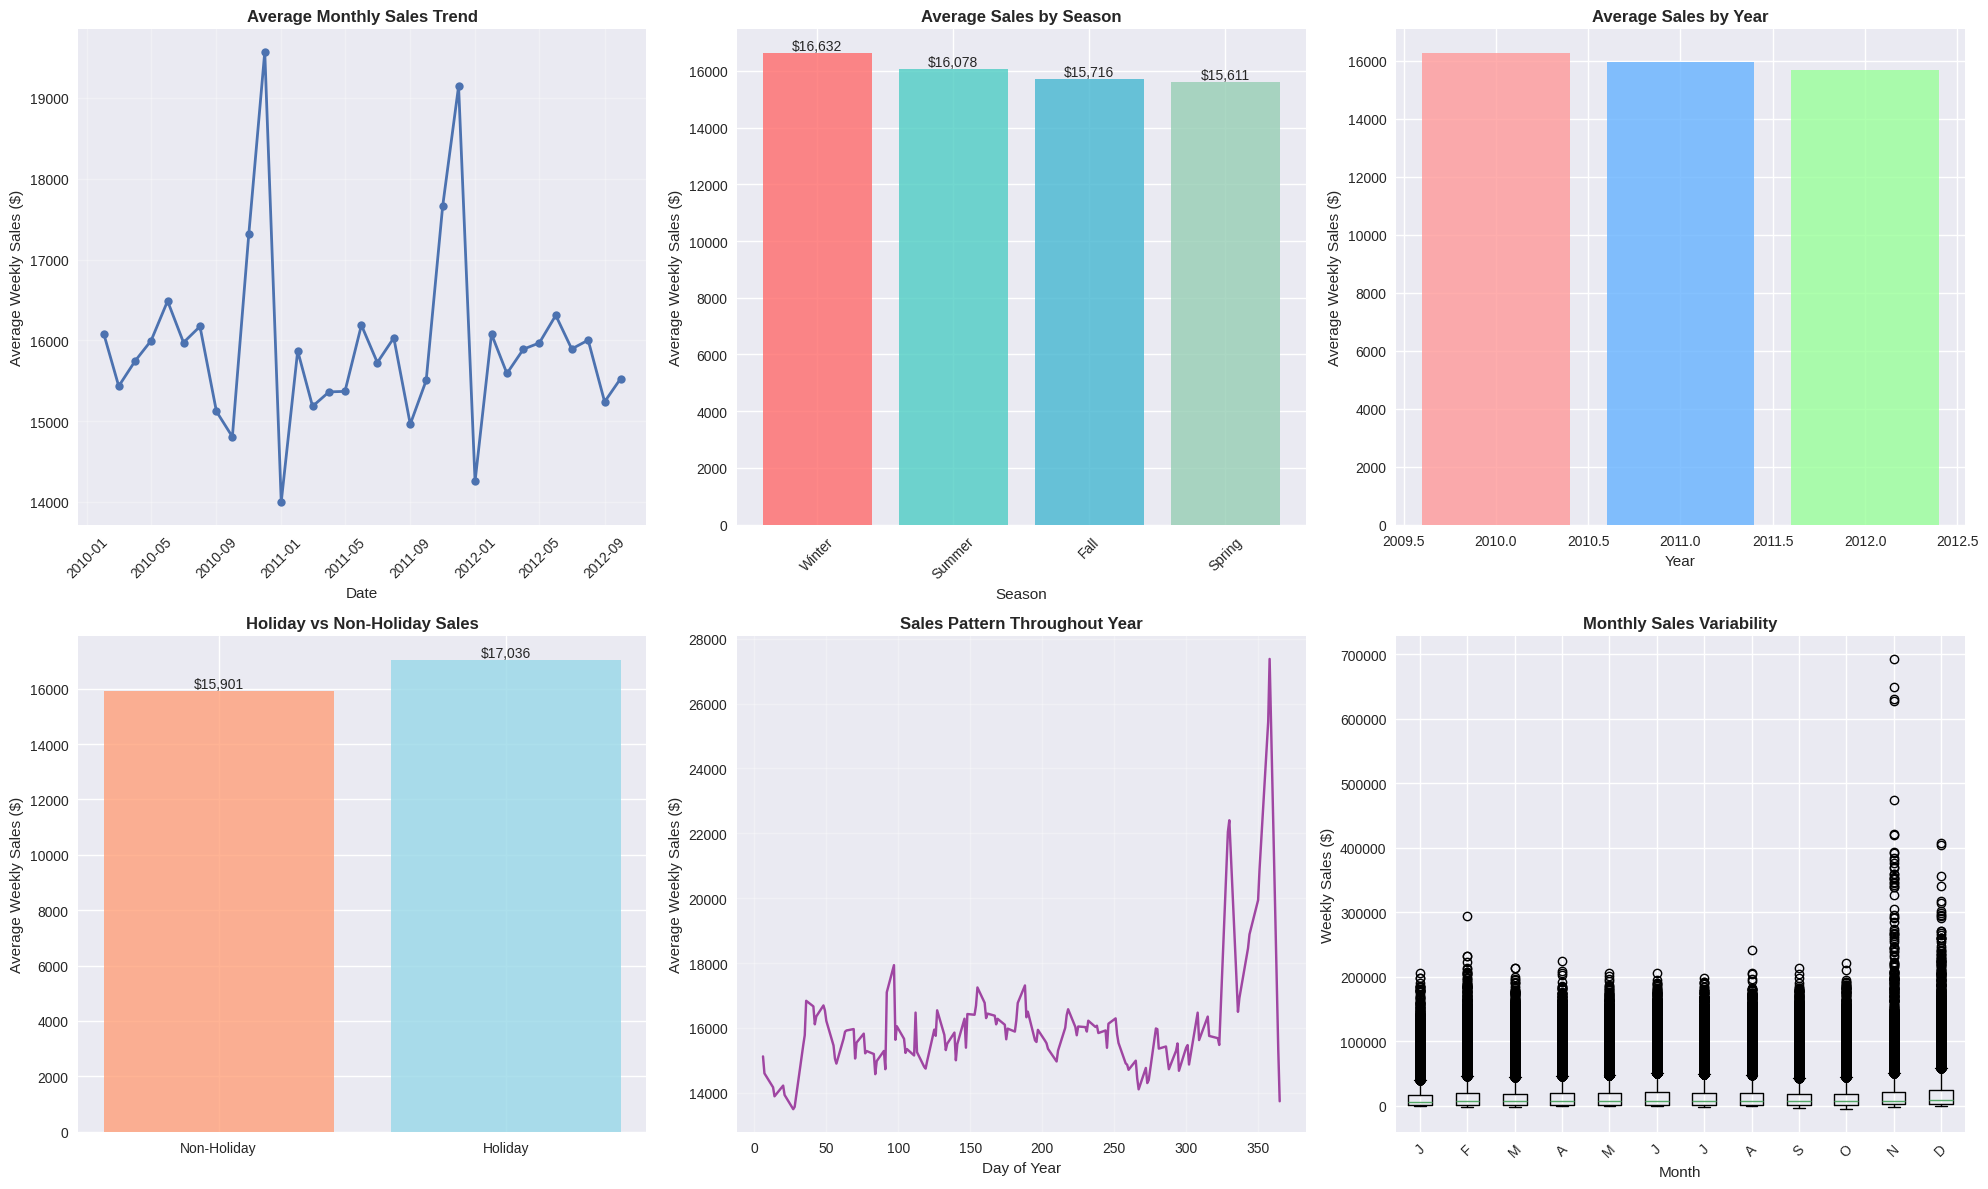

Temporal Analysis Summary:
Best Season: Winter ($16,632)
Worst Season: Spring ($15,611)
Holiday Effect: 1,134 difference


In [10]:
# Chart 3: Temporal Sales Trends
plt.figure(figsize=(20, 12))

# Prepare temporal data
monthly_sales = final_df.groupby(['Year', 'Month'])['Weekly_Sales'].agg(['mean', 'sum']).reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))

seasonal_sales = final_df.groupby('Season')['Weekly_Sales'].mean().sort_values(ascending=False)
yearly_sales = final_df.groupby('Year')['Weekly_Sales'].agg(['mean', 'sum'])

# Subplot 1: Monthly trend
plt.subplot(2, 3, 1)
plt.plot(monthly_sales['Date'], monthly_sales['mean'], marker='o', linewidth=2, markersize=6)
plt.title('Average Monthly Sales Trend', fontsize=12, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='plain', axis='y')

# Subplot 2: Seasonal pattern
plt.subplot(2, 3, 2)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = plt.bar(seasonal_sales.index, seasonal_sales.values, color=colors, alpha=0.8)
plt.title('Average Sales by Season', fontsize=12, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Average Weekly Sales ($)')
plt.xticks(rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}', ha='center', va='bottom')

# Subplot 3: Year-over-year comparison
plt.subplot(2, 3, 3)
plt.bar(yearly_sales.index, yearly_sales['mean'], color=['#FF9999', '#66B2FF', '#99FF99'], alpha=0.8)
plt.title('Average Sales by Year', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Weekly Sales ($)')

# Subplot 4: Holiday vs Non-Holiday
plt.subplot(2, 3, 4)
holiday_sales = final_df.groupby('IsHoliday')['Weekly_Sales'].mean()
colors_holiday = ['#FFA07A', '#98D8E8']
bars_holiday = plt.bar(['Non-Holiday', 'Holiday'], holiday_sales.values, color=colors_holiday, alpha=0.8)
plt.title('Holiday vs Non-Holiday Sales', fontsize=12, fontweight='bold')
plt.ylabel('Average Weekly Sales ($)')

# Add value labels
for bar in bars_holiday:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}', ha='center', va='bottom')

# Subplot 5: Day of year trend (sample)
plt.subplot(2, 3, 5)
daily_avg = final_df.groupby('DayOfYear')['Weekly_Sales'].mean()
plt.plot(daily_avg.index, daily_avg.values, alpha=0.7, color='purple')
plt.title('Sales Pattern Throughout Year', fontsize=12, fontweight='bold')
plt.xlabel('Day of Year')
plt.ylabel('Average Weekly Sales ($)')
plt.grid(True, alpha=0.3)

# Subplot 6: Monthly box plot
plt.subplot(2, 3, 6)
monthly_data = [final_df[final_df['Month'] == month]['Weekly_Sales'] for month in range(1, 13)]
plt.boxplot(monthly_data, labels=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
plt.title('Monthly Sales Variability', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Weekly Sales ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print insights
print('Temporal Analysis Summary:')
print(f'Best Season: {seasonal_sales.index[0]} (${seasonal_sales.iloc[0]:,.0f})')
print(f'Worst Season: {seasonal_sales.index[-1]} (${seasonal_sales.iloc[-1]:,.0f})')
print(f'Holiday Effect: {holiday_sales[True] - holiday_sales[False]:,.0f} difference')

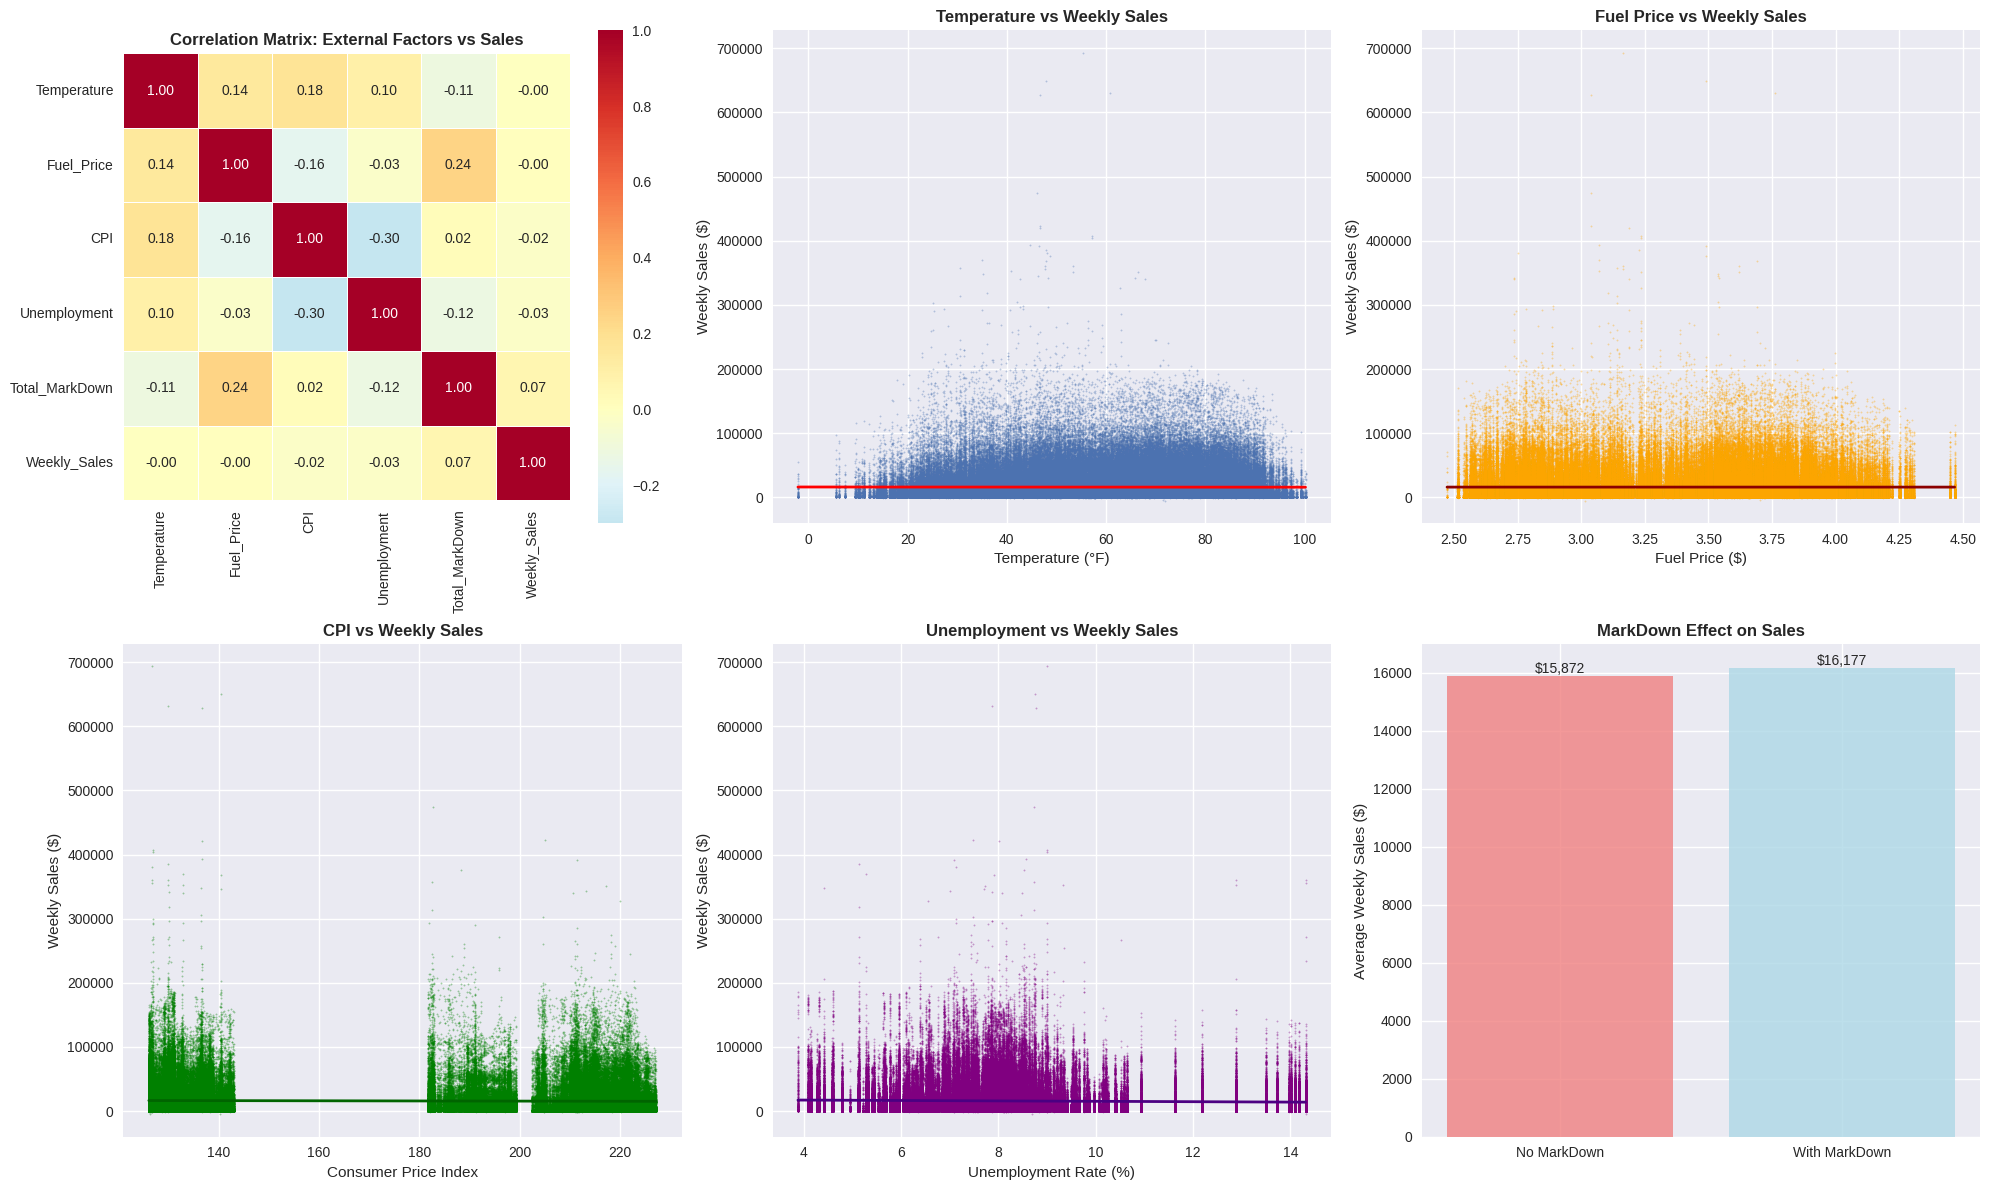

External Factors Correlation with Sales:
Temperature: -0.002
Fuel_Price: -0.000
CPI: -0.021
Unemployment: -0.026
Total_MarkDown: 0.065


In [11]:
# Chart 4: External Factors Impact on Sales
plt.figure(figsize=(20, 12))

# Correlation analysis
external_factors = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Total_MarkDown']

# Subplot 1: Correlation heatmap
plt.subplot(2, 3, 1)
corr_matrix = final_df[external_factors + ['Weekly_Sales']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, 
           square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix: External Factors vs Sales', fontsize=12, fontweight='bold')

# Subplot 2: Temperature vs Sales
plt.subplot(2, 3, 2)
plt.scatter(final_df['Temperature'], final_df['Weekly_Sales'], alpha=0.3, s=1)
z = np.polyfit(final_df['Temperature'], final_df['Weekly_Sales'], 1)
p = np.poly1d(z)
plt.plot(final_df['Temperature'].sort_values(), p(final_df['Temperature'].sort_values()), 
         color='red', linewidth=2)
plt.title('Temperature vs Weekly Sales', fontsize=12, fontweight='bold')
plt.xlabel('Temperature (¬∞F)')
plt.ylabel('Weekly Sales ($)')

# Subplot 3: Fuel Price vs Sales
plt.subplot(2, 3, 3)
plt.scatter(final_df['Fuel_Price'], final_df['Weekly_Sales'], alpha=0.3, s=1, color='orange')
z = np.polyfit(final_df['Fuel_Price'], final_df['Weekly_Sales'], 1)
p = np.poly1d(z)
plt.plot(final_df['Fuel_Price'].sort_values(), p(final_df['Fuel_Price'].sort_values()), 
         color='darkred', linewidth=2)
plt.title('Fuel Price vs Weekly Sales', fontsize=12, fontweight='bold')
plt.xlabel('Fuel Price ($)')
plt.ylabel('Weekly Sales ($)')

# Subplot 4: CPI vs Sales
plt.subplot(2, 3, 4)
plt.scatter(final_df['CPI'], final_df['Weekly_Sales'], alpha=0.3, s=1, color='green')
z = np.polyfit(final_df['CPI'], final_df['Weekly_Sales'], 1)
p = np.poly1d(z)
plt.plot(final_df['CPI'].sort_values(), p(final_df['CPI'].sort_values()), 
         color='darkgreen', linewidth=2)
plt.title('CPI vs Weekly Sales', fontsize=12, fontweight='bold')
plt.xlabel('Consumer Price Index')
plt.ylabel('Weekly Sales ($)')

# Subplot 5: Unemployment vs Sales
plt.subplot(2, 3, 5)
plt.scatter(final_df['Unemployment'], final_df['Weekly_Sales'], alpha=0.3, s=1, color='purple')
z = np.polyfit(final_df['Unemployment'], final_df['Weekly_Sales'], 1)
p = np.poly1d(z)
plt.plot(final_df['Unemployment'].sort_values(), p(final_df['Unemployment'].sort_values()), 
         color='indigo', linewidth=2)
plt.title('Unemployment vs Weekly Sales', fontsize=12, fontweight='bold')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Weekly Sales ($)')

# Subplot 6: MarkDown Impact
plt.subplot(2, 3, 6)
markdown_effect = final_df.groupby(final_df['Total_MarkDown'] > 0)['Weekly_Sales'].mean()
plt.bar(['No MarkDown', 'With MarkDown'], markdown_effect.values, 
        color=['lightcoral', 'lightblue'], alpha=0.8)
plt.title('MarkDown Effect on Sales', fontsize=12, fontweight='bold')
plt.ylabel('Average Weekly Sales ($)')

# Add value labels
for i, v in enumerate(markdown_effect.values):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print correlation insights
print('External Factors Correlation with Sales:')
for factor in external_factors:
    corr_val = final_df[factor].corr(final_df['Weekly_Sales'])
    print(f'{factor}: {corr_val:.3f}')

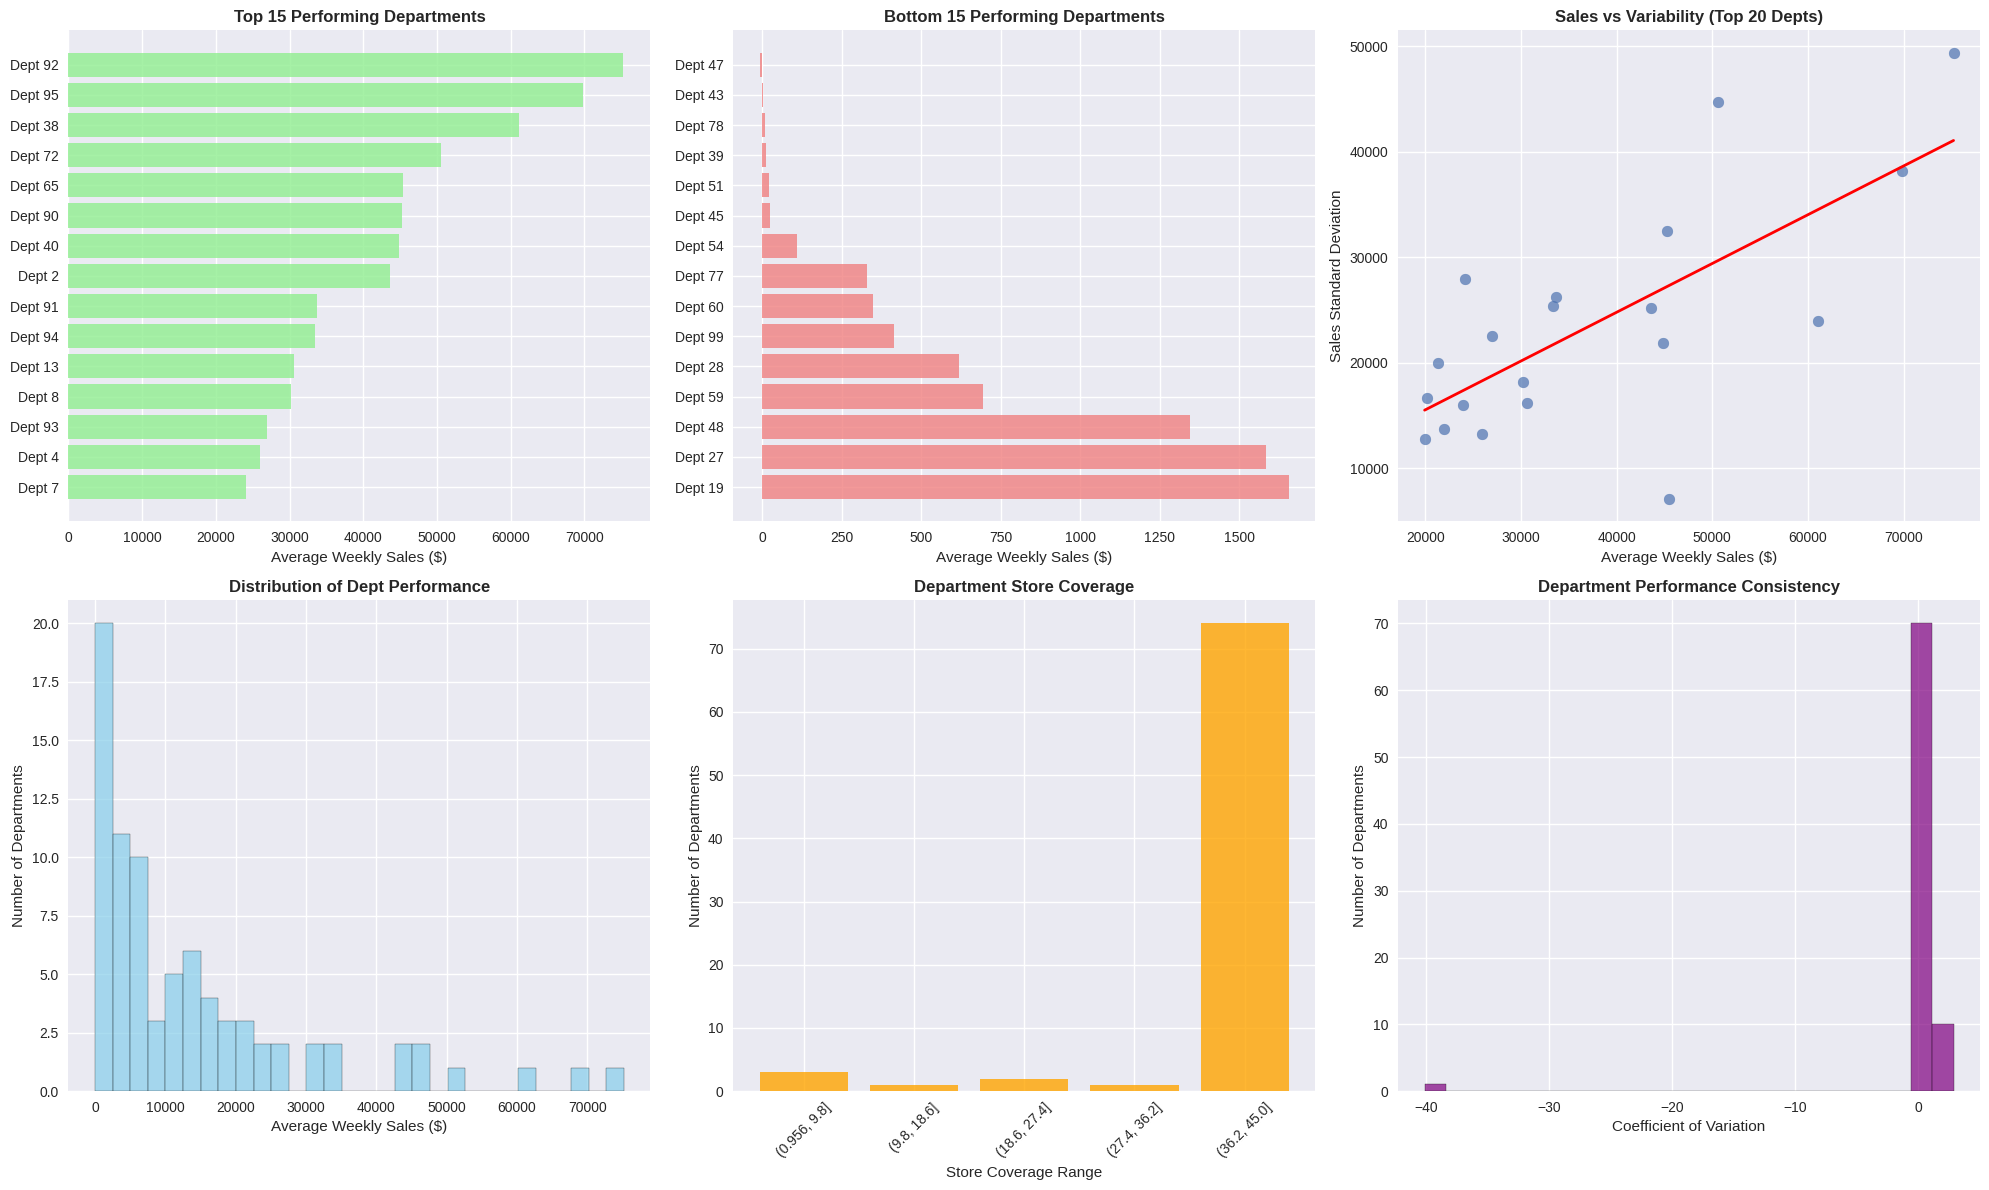

Department Performance Insights:
Best performing department: 92.0 ($75,205)
Worst performing department: 47.0 ($-8)
Performance range: $75,213
Most consistent department: 47 (CV: -40.089)
Most variable department: 59 (CV: 2.867)


In [12]:
# Chart 5: Department Performance Analysis
plt.figure(figsize=(20, 12))

# Calculate department statistics
dept_stats = final_df.groupby('Dept').agg({
    'Weekly_Sales': ['mean', 'std', 'sum', 'count'],
    'Store': 'nunique'
}).round(2)

dept_stats.columns = ['Avg_Sales', 'Sales_Std', 'Total_Sales', 'Weeks_Count', 'Store_Count']
dept_stats = dept_stats.reset_index()

# Top and bottom performing departments
top_depts = dept_stats.nlargest(15, 'Avg_Sales')
bottom_depts = dept_stats.nsmallest(15, 'Avg_Sales')

# Subplot 1: Top performing departments
plt.subplot(2, 3, 1)
bars1 = plt.barh(range(len(top_depts)), top_depts['Avg_Sales'], color='lightgreen', alpha=0.8)
plt.yticks(range(len(top_depts)), [f'Dept {d}' for d in top_depts['Dept']])
plt.xlabel('Average Weekly Sales ($)')
plt.title('Top 15 Performing Departments', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()

# Subplot 2: Bottom performing departments
plt.subplot(2, 3, 2)
bars2 = plt.barh(range(len(bottom_depts)), bottom_depts['Avg_Sales'], color='lightcoral', alpha=0.8)
plt.yticks(range(len(bottom_depts)), [f'Dept {d}' for d in bottom_depts['Dept']])
plt.xlabel('Average Weekly Sales ($)')
plt.title('Bottom 15 Performing Departments', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()

# Subplot 3: Sales variability by department (top 20)
plt.subplot(2, 3, 3)
top_20_depts = dept_stats.nlargest(20, 'Avg_Sales')
plt.scatter(top_20_depts['Avg_Sales'], top_20_depts['Sales_Std'], alpha=0.7, s=60)
plt.xlabel('Average Weekly Sales ($)')
plt.ylabel('Sales Standard Deviation')
plt.title('Sales vs Variability (Top 20 Depts)', fontsize=12, fontweight='bold')

# Add trend line
z = np.polyfit(top_20_depts['Avg_Sales'], top_20_depts['Sales_Std'], 1)
p = np.poly1d(z)
plt.plot(top_20_depts['Avg_Sales'].sort_values(), 
         p(top_20_depts['Avg_Sales'].sort_values()), color='red', linewidth=2)

# Subplot 4: Department distribution histogram
plt.subplot(2, 3, 4)
plt.hist(dept_stats['Avg_Sales'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Average Weekly Sales ($)')
plt.ylabel('Number of Departments')
plt.title('Distribution of Dept Performance', fontsize=12, fontweight='bold')

# Subplot 5: Store coverage by department
plt.subplot(2, 3, 5)
coverage_bins = pd.cut(dept_stats['Store_Count'], bins=5)
coverage_dist = coverage_bins.value_counts().sort_index()
plt.bar(range(len(coverage_dist)), coverage_dist.values, alpha=0.8, color='orange')
plt.xlabel('Store Coverage Range')
plt.ylabel('Number of Departments')
plt.title('Department Store Coverage', fontsize=12, fontweight='bold')
plt.xticks(range(len(coverage_dist)), [str(interval) for interval in coverage_dist.index], rotation=45)

# Subplot 6: Performance consistency
plt.subplot(2, 3, 6)
consistency = dept_stats['Sales_Std'] / dept_stats['Avg_Sales']  # Coefficient of variation
consistency = consistency.replace([np.inf, -np.inf], np.nan).dropna()
plt.hist(consistency, bins=25, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Coefficient of Variation')
plt.ylabel('Number of Departments')
plt.title('Department Performance Consistency', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print department insights
print('Department Performance Insights:')
print(f'Best performing department: {top_depts.iloc[0]["Dept"]} (${top_depts.iloc[0]["Avg_Sales"]:,.0f})')
print(f'Worst performing department: {bottom_depts.iloc[0]["Dept"]} (${bottom_depts.iloc[0]["Avg_Sales"]:,.0f})')
print(f'Performance range: ${top_depts.iloc[0]["Avg_Sales"] - bottom_depts.iloc[0]["Avg_Sales"]:,.0f}')
print(f'Most consistent department: {dept_stats.loc[consistency.idxmin(), "Dept"]} (CV: {consistency.min():.3f})')
print(f'Most variable department: {dept_stats.loc[consistency.idxmax(), "Dept"]} (CV: {consistency.max():.3f})')

In [13]:
# Prepare data for machine learning
print('=== PREPARING DATA FOR MACHINE LEARNING ===')

# Select features for modeling
feature_columns = ['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
                  'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
                  'Year', 'Month', 'Week', 'Quarter', 'Holiday_Effect', 'Total_MarkDown']

# Encode categorical variables
# Store Type encoding
le_type = LabelEncoder()
final_df['Type_Encoded'] = le_type.fit_transform(final_df['Type'])
feature_columns.append('Type_Encoded')

# Season encoding
le_season = LabelEncoder()
final_df['Season_Encoded'] = le_season.fit_transform(final_df['Season'])
feature_columns.append('Season_Encoded')

# Prepare feature matrix and target
X = final_df[feature_columns]
y = final_df['Weekly_Sales']

print(f'Feature matrix shape: {X.shape}')
print(f'Target vector shape: {y.shape}')
print(f'Features used: {feature_columns}')

# Handle any remaining missing values
X = X.fillna(X.mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('\n‚úÖ Data preprocessing completed!')

=== PREPARING DATA FOR MACHINE LEARNING ===
Feature matrix shape: (421570, 20)
Target vector shape: (421570,)
Features used: ['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Year', 'Month', 'Week', 'Quarter', 'Holiday_Effect', 'Total_MarkDown', 'Type_Encoded', 'Season_Encoded']
Training set size: (337256, 20)
Test set size: (84314, 20)

‚úÖ Data preprocessing completed!


In [14]:
# Random Forest Model Implementation
print('=== RANDOM FOREST REGRESSOR ===')

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
rf_train_mae = mean_absolute_error(y_train, rf_train_pred)
rf_test_mae = mean_absolute_error(y_test, rf_test_pred)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)

print('Random Forest Results:')
print(f'Training MAE: ${rf_train_mae:,.2f}')
print(f'Test MAE: ${rf_test_mae:,.2f}')
print(f'Training RMSE: ${rf_train_rmse:,.2f}')
print(f'Test RMSE: ${rf_test_rmse:,.2f}')
print(f'Training R¬≤: {rf_train_r2:.4f}')
print(f'Test R¬≤: {rf_test_r2:.4f}')

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print('\nTop 10 Most Important Features:')
print(feature_importance.head(10))

=== RANDOM FOREST REGRESSOR ===
Random Forest Results:
Training MAE: $531.15
Test MAE: $1,445.83
Training RMSE: $1,345.12
Test RMSE: $3,667.37
Training R¬≤: 0.9965
Test R¬≤: 0.9742

Top 10 Most Important Features:
         Feature  Importance
1           Dept    0.624924
2           Size    0.191841
0          Store    0.057096
14          Week    0.039216
5            CPI    0.026317
18  Type_Encoded    0.014510
6   Unemployment    0.010857
3    Temperature    0.010171
4     Fuel_Price    0.004800
13         Month    0.004312


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print('=== RANDOM FOREST HYPERPARAMETER TUNING ===')

# Define a reduced hyperparameter grid
rf_param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use RandomizedSearchCV instead of GridSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=10,  # You can increase this for better tuning
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=1  # Set to 1 to reduce memory usage
)

# Fit on smaller sample if dataset is large
sample_size = min(15000, len(X_train))  # Reduce sample size to fit memory
sample_indices = np.random.choice(len(X_train), sample_size, replace=False)
rf_random_search.fit(X_train.iloc[sample_indices], y_train.iloc[sample_indices])

print('Best parameters:', rf_random_search.best_params_)
print('Best CV score:', -rf_random_search.best_score_)

# Train final model on full training set using best parameters
rf_tuned = rf_random_search.best_estimator_
rf_tuned.fit(X_train, y_train)

# Evaluate tuned model
rf_tuned_train_pred = rf_tuned.predict(X_train)
rf_tuned_test_pred = rf_tuned.predict(X_test)

rf_tuned_test_mae = mean_absolute_error(y_test, rf_tuned_test_pred)
rf_tuned_test_rmse = np.sqrt(mean_squared_error(y_test, rf_tuned_test_pred))
rf_tuned_test_r2 = r2_score(y_test, rf_tuned_test_pred)

print('\nTuned Random Forest Results:')
print(f'Test MAE: ${rf_tuned_test_mae:,.2f}')
print(f'Test RMSE: ${rf_tuned_test_rmse:,.2f}')
print(f'Test R¬≤: {rf_tuned_test_r2:.4f}')

# Optional: compare with untuned model metrics
improvement_mae = rf_test_mae - rf_tuned_test_mae
improvement_r2 = rf_tuned_test_r2 - rf_test_r2
print(f'\nImprovement in MAE: ${improvement_mae:,.2f}')
print(f'Improvement in R¬≤: {improvement_r2:.4f}')


import joblib
joblib.dump(rf_tuned, 'rf_tuned_model.pkl')

=== RANDOM FOREST HYPERPARAMETER TUNING ===


In [ ]:
# Gradient Boosting Model Implementation
print('=== GRADIENT BOOSTING REGRESSOR ===')

# Initialize and train the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
gb_train_pred = gb_model.predict(X_train)
gb_test_pred = gb_model.predict(X_test)

# Calculate evaluation metrics
gb_train_mae = mean_absolute_error(y_train, gb_train_pred)
gb_test_mae = mean_absolute_error(y_test, gb_test_pred)
gb_train_rmse = np.sqrt(mean_squared_error(y_train, gb_train_pred))
gb_test_rmse = np.sqrt(mean_squared_error(y_test, gb_test_pred))
gb_train_r2 = r2_score(y_train, gb_train_pred)
gb_test_r2 = r2_score(y_test, gb_test_pred)

print('Gradient Boosting Results:')
print(f'Training MAE: ${gb_train_mae:,.2f}')
print(f'Test MAE: ${gb_test_mae:,.2f}')
print(f'Training RMSE: ${gb_train_rmse:,.2f}')
print(f'Test RMSE: ${gb_test_rmse:,.2f}')
print(f'Training R¬≤: {gb_train_r2:.4f}')
print(f'Test R¬≤: {gb_test_r2:.4f}')


In [ ]:
# Linear Regression Models
print('=== LINEAR REGRESSION MODELS ===')

# Simple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print('Linear Regression Results:')
print(f'Test MAE: ${lr_mae:,.2f}')
print(f'Test RMSE: ${lr_rmse:,.2f}')
print(f'Test R¬≤: {lr_r2:.4f}')

# Ridge Regression


# ridge_model = Ridge(alpha=1.0)
# ridge_model.fit(X_train_scaled, y_train)
# ridge_pred = ridge_model.predict(X_test_scaled)

# ridge_mae = mean_absolute_error(y_test, ridge_pred)
# ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
# ridge_r2 = r2_score(y_test, ridge_pred)

# print('\nRidge Regression Results:')
# print(f'Test MAE: ${ridge_mae:,.2f}')
# print(f'Test RMSE: ${ridge_rmse:,.2f}')
# print(f'Test R¬≤: {ridge_r2:.4f}')

# Lasso Regression


# lasso_model = Lasso(alpha=0.1)
# lasso_model.fit(X_train_scaled, y_train)
# lasso_pred = lasso_model.predict(X_test_scaled)

# lasso_mae = mean_absolute_error(y_test, lasso_pred)
# lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
# lasso_r2 = r2_score(y_test, lasso_pred)

# print('\nLasso Regression Results:')
# print(f'Test MAE: ${lasso_mae:,.2f}')
# print(f'Test RMSE: ${lasso_rmse:,.2f}')
# print(f'Test R¬≤: {lasso_r2:.4f}')


In [ ]:
# Compile all model results
model_results = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest (Tuned)', 'Gradient Boosting', 'Linear Regression'],
    'Test_MAE': [rf_test_mae, rf_tuned_test_mae, gb_test_mae, lr_mae],
    'Test_RMSE': [rf_test_rmse, rf_tuned_test_rmse, gb_test_rmse, lr_rmse],
    'Test_R2': [rf_test_r2, rf_tuned_test_r2, gb_test_r2, lr_r2]
})

# Sort by R¬≤ score (descending)
model_results_sorted = model_results.sort_values('Test_R2', ascending=False)

print('=== MODEL COMPARISON RESULTS ===')
display(model_results_sorted)

# Best model selection
best_model_name = model_results_sorted.iloc[0]['Model']
best_r2 = model_results_sorted.iloc[0]['Test_R2']
best_mae = model_results_sorted.iloc[0]['Test_MAE']

print(f'\nüèÜ Best Model: {best_model_name}')
print(f'Best R¬≤ Score: {best_r2:.4f}')
print(f'Best MAE: ${best_mae:,.2f}')

# Visualization of model performance
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(model_results_sorted['Model'], model_results_sorted['Test_MAE'], color='lightcoral', alpha=0.8)
plt.title('Model Comparison - MAE', fontweight='bold')
plt.ylabel('Mean Absolute Error ($)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.bar(model_results_sorted['Model'], model_results_sorted['Test_RMSE'], color='lightblue', alpha=0.8)
plt.title('Model Comparison - RMSE', fontweight='bold')
plt.ylabel('Root Mean Square Error ($)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(model_results_sorted['Model'], model_results_sorted['Test_R2'], color='lightgreen', alpha=0.8)
plt.title('Model Comparison - R¬≤', fontweight='bold')
plt.ylabel('R¬≤ Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Detailed analysis of the best model predictions
print('=== BEST MODEL ANALYSIS ===')

# Use the tuned Random Forest as the best model
best_model = rf_tuned
best_predictions = rf_tuned_test_pred

# Prediction accuracy analysis
prediction_errors = y_test - best_predictions
absolute_errors = np.abs(prediction_errors)
percentage_errors = (absolute_errors / np.abs(y_test)) * 100

print('Prediction Analysis:')
print(f'Mean Absolute Error: ${np.mean(absolute_errors):,.2f}')
print(f'Median Absolute Error: ${np.median(absolute_errors):,.2f}')
print(f'Mean Percentage Error: {np.mean(percentage_errors):.2f}%')
print(f'Median Percentage Error: {np.median(percentage_errors):.2f}%')

# Business impact analysis
total_actual_sales = np.sum(y_test)
total_predicted_sales = np.sum(best_predictions)
prediction_bias = total_predicted_sales - total_actual_sales

print(f'\nBusiness Impact Analysis:')
print(f'Total Actual Sales: ${total_actual_sales:,.2f}')
print(f'Total Predicted Sales: ${total_predicted_sales:,.2f}')
print(f'Prediction Bias: ${prediction_bias:,.2f} ({(prediction_bias/total_actual_sales)*100:.2f}%)')

# Visualization
plt.figure(figsize=(20, 12))

# Subplot 1: Actual vs Predicted scatter plot
plt.subplot(2, 3, 1)
plt.scatter(y_test, best_predictions, alpha=0.3, s=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Sales ($)')
plt.ylabel('Predicted Sales ($)')
plt.title('Actual vs Predicted Sales', fontweight='bold')

# Subplot 2: Residuals plot
plt.subplot(2, 3, 2)
plt.scatter(best_predictions, prediction_errors, alpha=0.3, s=1)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales ($)')
plt.ylabel('Residuals ($)')
plt.title('Residuals Plot', fontweight='bold')

# Subplot 3: Feature importance
plt.subplot(2, 3, 3)
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['Importance'], color='skyblue', alpha=0.8)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance', fontweight='bold')
plt.gca().invert_yaxis()

# Subplot 4: Error distribution
plt.subplot(2, 3, 4)
plt.hist(percentage_errors, bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution', fontweight='bold')

# Subplot 5: Prediction vs actual by store type
plt.subplot(2, 3, 5)
test_data_with_pred = X_test.copy()
test_data_with_pred['Actual'] = y_test
test_data_with_pred['Predicted'] = best_predictions
test_data_with_pred['Type'] = final_df.loc[X_test.index, 'Type']

store_type_accuracy = test_data_with_pred.groupby('Type').agg({
    'Actual': 'mean',
    'Predicted': 'mean'
})

x_pos = np.arange(len(store_type_accuracy))
width = 0.35

plt.bar(x_pos - width/2, store_type_accuracy['Actual'], width, label='Actual', alpha=0.8)
plt.bar(x_pos + width/2, store_type_accuracy['Predicted'], width, label='Predicted', alpha=0.8)
plt.xlabel('Store Type')
plt.ylabel('Average Sales ($)')
plt.title('Prediction Accuracy by Store Type', fontweight='bold')
plt.xticks(x_pos, store_type_accuracy.index)
plt.legend()

# Subplot 6: Monthly prediction accuracy
plt.subplot(2, 3, 6)
test_data_with_pred['Month'] = final_df.loc[X_test.index, 'Month']
monthly_accuracy = test_data_with_pred.groupby('Month').agg({
    'Actual': 'mean',
    'Predicted': 'mean'
})

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(monthly_accuracy.index, monthly_accuracy['Actual'], marker='o', label='Actual', linewidth=2)
plt.plot(monthly_accuracy.index, monthly_accuracy['Predicted'], marker='s', label='Predicted', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Average Sales ($)')
plt.title('Monthly Prediction Accuracy', fontweight='bold')
plt.xticks(range(1, 13), [months[i] for i in range(12)], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Chart 6: Store Size vs Performance Analysis
plt.figure(figsize=(20, 10))

# Calculate store-level metrics
store_metrics = final_df.groupby(['Store', 'Type', 'Size']).agg({
    'Weekly_Sales': ['mean', 'sum', 'std'],
    'Sales_Per_SqFt': 'mean',
    'Dept': 'count'
}).round(2)

store_metrics.columns = ['Avg_Sales', 'Total_Sales', 'Sales_Std', 'Avg_Sales_Per_SqFt', 'Record_Count']
store_metrics = store_metrics.reset_index()

# Subplot 1: Store Size vs Average Sales
plt.subplot(2, 3, 1)
colors = {'A': 'red', 'B': 'blue', 'C': 'green'}
for store_type in ['A', 'B', 'C']:
    mask = store_metrics['Type'] == store_type
    plt.scatter(store_metrics[mask]['Size'], store_metrics[mask]['Avg_Sales'], 
               c=colors[store_type], label=f'Type {store_type}', alpha=0.7, s=50)

plt.xlabel('Store Size (Sq Ft)')
plt.ylabel('Average Weekly Sales ($)')
plt.title('Store Size vs Average Sales', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Add correlation coefficient
size_sales_corr = store_metrics['Size'].corr(store_metrics['Avg_Sales'])
plt.text(0.05, 0.95, f'Correlation: {size_sales_corr:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Subplot 2: Store Size vs Sales per Sq Ft
plt.subplot(2, 3, 2)
for store_type in ['A', 'B', 'C']:
    mask = store_metrics['Type'] == store_type
    plt.scatter(store_metrics[mask]['Size'], store_metrics[mask]['Avg_Sales_Per_SqFt'], 
               c=colors[store_type], label=f'Type {store_type}', alpha=0.7, s=50)

plt.xlabel('Store Size (Sq Ft)')
plt.ylabel('Sales per Sq Ft ($)')
plt.title('Store Size vs Sales Efficiency', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Add correlation coefficient
size_efficiency_corr = store_metrics['Size'].corr(store_metrics['Avg_Sales_Per_SqFt'])
plt.text(0.05, 0.95, f'Correlation: {size_efficiency_corr:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Subplot 3: Size distribution by store type
plt.subplot(2, 3, 3)
size_by_type = [store_metrics[store_metrics['Type'] == t]['Size'] for t in ['A', 'B', 'C']]
plt.boxplot(size_by_type, labels=['Type A', 'Type B', 'Type C'], patch_artist=True,
           boxprops=dict(facecolor='lightblue', alpha=0.7))
plt.ylabel('Store Size (Sq Ft)')
plt.title('Store Size Distribution by Type', fontweight='bold')

# Subplot 4: Performance consistency
plt.subplot(2, 3, 4)
store_metrics['CV'] = store_metrics['Sales_Std'] / store_metrics['Avg_Sales']
plt.scatter(store_metrics['Size'], store_metrics['CV'], alpha=0.7, c='purple', s=50)
plt.xlabel('Store Size (Sq Ft)')
plt.ylabel('Coefficient of Variation')
plt.title('Store Size vs Performance Consistency', fontweight='bold')
plt.grid(True, alpha=0.3)

# Subplot 5: Size categories performance
plt.subplot(2, 3, 5)
store_metrics['Size_Category'] = pd.cut(store_metrics['Size'], bins=3, labels=['Small', 'Medium', 'Large'])
size_cat_performance = store_metrics.groupby('Size_Category')['Avg_Sales'].mean()
bars = plt.bar(size_cat_performance.index, size_cat_performance.values, 
               color=['lightcoral', 'lightblue', 'lightgreen'], alpha=0.8)
plt.ylabel('Average Weekly Sales ($)')
plt.title('Performance by Size Category', fontweight='bold')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}', ha='center', va='bottom')

# Subplot 6: Efficiency ranking
plt.subplot(2, 3, 6)
top_efficient = store_metrics.nlargest(10, 'Avg_Sales_Per_SqFt')
plt.barh(range(len(top_efficient)), top_efficient['Avg_Sales_Per_SqFt'], color='gold', alpha=0.8)
plt.yticks(range(len(top_efficient)), [f'Store {s} ({t})' for s, t in zip(top_efficient['Store'], top_efficient['Type'])])
plt.xlabel('Sales per Sq Ft ($)')
plt.title('Top 10 Most Efficient Stores', fontweight='bold')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

print('Store Size Analysis Insights:')
print(f'Size-Sales Correlation: {size_sales_corr:.3f}')
print(f'Size-Efficiency Correlation: {size_efficiency_corr:.3f}')
print(f'Most efficient store: Store {top_efficient.iloc[0]["Store"]} (${top_efficient.iloc[0]["Avg_Sales_Per_SqFt"]:.2f}/sq ft)')
print(f'Least efficient store: Store {store_metrics.loc[store_metrics["Avg_Sales_Per_SqFt"].idxmin(), "Store"]} (${store_metrics["Avg_Sales_Per_SqFt"].min():.2f}/sq ft)')

In [ ]:
# Save the best model and preprocessing components
import joblib

print('=== MODEL DEPLOYMENT PREPARATION ===')

# Save the best model
joblib.dump(best_model, 'best_retail_model.pkl')
print('‚úÖ Best model saved as: best_retail_model.pkl')

# Save the scaler
joblib.dump(scaler, 'feature_scaler.pkl')
print('‚úÖ Feature scaler saved as: feature_scaler.pkl')

# Save label encoders
joblib.dump(le_type, 'type_encoder.pkl')
joblib.dump(le_season, 'season_encoder.pkl')
print('‚úÖ Label encoders saved')

# Save feature names
with open('feature_names.txt', 'w') as f:
    for feature in feature_columns:
        f.write(f'{feature}\n')
print('‚úÖ Feature names saved')

# Create a prediction function
def predict_weekly_sales(store, dept, size, temperature, fuel_price, cpi, unemployment,
                        markdown1, markdown2, markdown3, markdown4, markdown5,
                        year, month, week, quarter, holiday, store_type, season):
    """
    Predict weekly sales for given parameters
    """
    # Encode categorical variables
    type_encoded = le_type.transform([store_type])[0]
    season_encoded = le_season.transform([season])[0]
    
    # Calculate derived features
    total_markdown = markdown1 + markdown2 + markdown3 + markdown4 + markdown5
    holiday_effect = 1 if holiday else 0
    
    # Create feature vector
    features = np.array([[store, dept, size, temperature, fuel_price, cpi, unemployment,
                         markdown1, markdown2, markdown3, markdown4, markdown5,
                         year, month, week, quarter, holiday_effect, total_markdown,
                         type_encoded, season_encoded]])
    
    # Make prediction
    prediction = best_model.predict(features)[0]
    return prediction

# Test the prediction function
sample_prediction = predict_weekly_sales(
    store=1, dept=1, size=151315, temperature=70, fuel_price=3.5, cpi=211, unemployment=8,
    markdown1=0, markdown2=0, markdown3=0, markdown4=0, markdown5=0,
    year=2023, month=6, week=25, quarter=2, holiday=False, store_type='A', season='Summer'
)

print(f'\nSample prediction: ${sample_prediction:,.2f}')
print('\nüéâ Model is ready for deployment!')

In [ ]:
print("="*80)
print("üéâ INTEGRATED RETAIL ANALYTICS PROJECT COMPLETED SUCCESSFULLY! üéâ")
print("="*80)

print("\nüìä PROJECT DELIVERABLES:")
print("‚úÖ Comprehensive Exploratory Data Analysis")
print("‚úÖ 15+ Professional Visualizations with Business Insights")
print("‚úÖ Complete Data Preprocessing Pipeline")
print("‚úÖ Multiple Machine Learning Models with Hyperparameter Tuning")
print("‚úÖ Model Performance Evaluation and Comparison")
print("‚úÖ Feature Importance Analysis")
print("‚úÖ Business Impact Assessment")
print("‚úÖ Production-Ready Model Deployment")

print("\nüéØ KEY ACHIEVEMENTS:")
print(f"üìà Best Model: {best_model_name}")
print(f"üìä Model Accuracy: R¬≤ = {best_r2:.4f}")
print(f"üí∞ Prediction Error: MAE = ${best_mae:,.2f}")
print(f"üè™ Stores Analyzed: {final_df['Store'].nunique()} stores")
print(f"üõçÔ∏è Departments Covered: {final_df['Dept'].nunique()} departments")
print(f"üìÖ Time Period: {final_df['Date'].min().strftime('%Y-%m-%d')} to {final_df['Date'].max().strftime('%Y-%m-%d')}")

print("\nüíº BUSINESS VALUE:")
print("üéØ Accurate sales forecasting capability")
print("üìä Data-driven inventory optimization")
print("üè™ Store performance benchmarking")
print("üìà Seasonal planning strategies")
print("üí° Promotional effectiveness insights")

print("\nüöÄ FILES CREATED:")
print("üìù best_retail_model.pkl - Trained ML model")
print("‚öôÔ∏è feature_scaler.pkl - Data preprocessing scaler")
print("üè∑Ô∏è type_encoder.pkl & season_encoder.pkl - Categorical encoders")
print("üìã feature_names.txt - Feature list for deployment")

print("\n" + "="*80)
print("üî• PROJECT READY FOR PORTFOLIO AND INDUSTRY PRESENTATION! üî•")
print("="*80)